# Your first CNN on CIFAR-10

In this task you will: 
* define your first CNN architecture for CIFAR-10 dataset
* train it from scratch
* visualize learnt filters

CIFAR-10 dataset contains 32x32 color images from 10 classes: __airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck__:

<img src="https://www.samyzaf.com/ML/cifar10/cifar1.jpg" style="width:80%">

# Import stuff

In [1]:
import warnings
warnings.simplefilter('ignore')
import tensorflow as tf
import keras
from keras import backend as K
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
print(tf.__version__)
print(keras.__version__)

2.7.0
2.7.0


In [2]:
from tensorflow.keras.datasets import cifar10

# Load dataset

* Use `tf.keras.datasets.cifar10.load_data()` to get the data
* split to 70 - 30 train / val using `train_test_split`

In [3]:
data = cifar10.load_data()

In [4]:
df, y = data[0][0], data[0][1]
test, yt = data[1][0], data[1][1]

In [5]:
print(df.shape, y.shape)
print(test.shape, yt.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_val, y_train, y_val = train_test_split(df, y, test_size=0.3)

In [8]:
NUM_CLASSES = 10
cifar10_classes = np.array(["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"])

In [9]:
print("Train samples:     ", X_train.shape, y_train.shape)
print("Validation samples:", X_val.shape, y_val.shape)

Train samples:      (35000, 32, 32, 3) (35000, 1)
Validation samples: (15000, 32, 32, 3) (15000, 1)


In [10]:
# help(ax.grid)

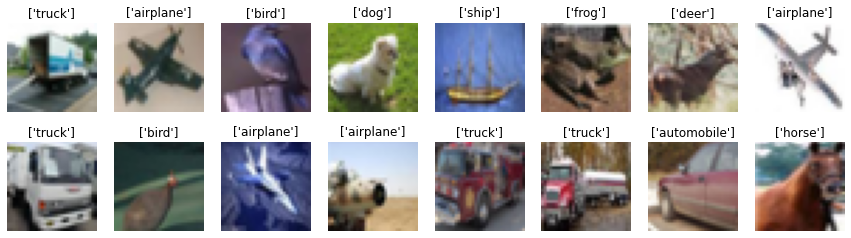

In [11]:
# show random images from train
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(X_train[random_index, :])
        ax.set_title(cifar10_classes[y_train[random_index]])
plt.show()

# Prepare data

* normalize the input like $x_{\text{norm}} = \frac{x}{255} - 0.5$
* We need to convert class labels to one-hot encoded vectors. Use `keras.utils.to_categorical`.

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
# convert class labels to one-hot encoded, should have shape (?, NUM_CLASSES)

y_train = tf.keras.utils.to_categorical(y=y_train, num_classes=NUM_CLASSES)
y_val = tf.keras.utils.to_categorical(y=y_val, num_classes=NUM_CLASSES)

# Define CNN architecture

In [14]:
# import necessary building blocks
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
# from keras.layers.advanced_activations import LeakyReLU

Convolutional networks are built from several types of layers:
- [Conv2D](https://keras.io/layers/convolutional/#conv2d) - performs convolution:
    - **filters**: number of output channels; 
    - **kernel_size**: an integer or tuple/list of 2 integers, specifying the width and height of the 2D convolution window;
    - **padding**: padding="same" adds zero padding to the input, so that the output has the same width and height, padding='valid' performs convolution only in locations where kernel and the input fully overlap;
    - **activation**: "relu", "tanh", etc.
    - **input_shape**: shape of input.
- [MaxPooling2D](https://keras.io/layers/pooling/#maxpooling2d) - performs 2D max pooling.
- [Flatten](https://keras.io/layers/core/#flatten) - flattens the input, does not affect the batch size.
- [Dense](https://keras.io/layers/core/#dense) - fully-connected layer.
- [Activation](https://keras.io/layers/core/#activation) - applies an activation function.
- [LeakyReLU](https://keras.io/layers/advanced-activations/#leakyrelu) - applies leaky relu activation.
- [Dropout](https://keras.io/layers/core/#dropout) - applies dropout.

### First step

Let's create a mini-convolutional network with roughly such architecture:
* Input layer
* 3x3 convolution with 10 filters and ReLU activation
* 3x3 pooling (or set previous convolution stride to 3)
* Dense layer with 100-neurons and ReLU activation
* 10% dropout
* Output dense layer.

You need to define a model which takes __(None, 32, 32, 3)__ input and predicts __(None, 10)__ output with probabilities for all classes. __None__ in shapes stands for batch dimension.

Simple feed-forward networks in Keras can be defined in the following way:

```python
model = Sequential()  # start feed-forward model definition
model.add(Conv2D(..., input_shape=(32, 32, 3)))  # first layer needs to define "input_shape"

...  # here comes a bunch of convolutional, pooling and dropout layers

model.add(Dense(NUM_CLASSES))  # the last layer with neuron for each class
model.add(Activation("softmax"))  # output probabilities
```


Train it with Adam optimizer with default params.


### Second step (after you've trained it)

* Add batch_norm (with default params) between convolution and pooling

Re-train the network with the same optimizer


In [15]:
from tensorflow.keras.layers import Conv2D, InputLayer, MaxPooling2D, Flatten, Dense, Dropout, Activation, Rescaling

In [42]:
def make_model():
    """
    Define your model architecture here.
    Returns `Sequential` model.
    """
    model = tf.keras.models.Sequential()
    model.add(InputLayer(input_shape=(32, 32, 3)))
    model.add(Rescaling(scale=1./255, offset=-0.5))
    model.add(Conv2D(filters=16, kernel_size=(3, 3), activation="relu", padding='same'))
    model.add(MaxPooling2D())
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu", padding='same'))
    model.add(MaxPooling2D())
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding='same'))
    model.add(MaxPooling2D())
    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation="relu", padding='same'))
    model.add(MaxPooling2D())
    model.add(Flatten())
    model.add(Dense(units=256, activation="relu"))
    model.add(Dense(units=10, activation="sigmoid"))    
    return model

In [43]:
# describe model
K.clear_session()  # clear default graph
model = make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          1

# Train model

Training of your model can take approx. 4-8 minutes per epoch.

During training you should observe the decrease in reported loss on training and validation.

If the loss on training is not decreasing with epochs you should revise your model definition and learning rate.

In [44]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Accuracy

In [54]:
INIT_LR = 5e-3  # initial learning rate
BATCH_SIZE = 32
EPOCHS = 10

K.clear_session()  # clear default graph
# don't call K.set_learning_phase() !!! (otherwise will enable dropout in train/test simultaneously)
model = make_model()  # define our model

# prepare model for fitting (loss, optimizer, etc)
model.compile(
    loss=CategoricalCrossentropy(),  # we train 10-way classification
    optimizer=Adamax(learning_rate=INIT_LR),  # for SGD
    metrics="accuracy"  # report accuracy during training
)

In [55]:
model.fit(
    X_train, y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(X_val, y_val),
    shuffle=True,
)

Epoch 1/10
1094/1094 [==============================] - 31s 27ms/step - loss: 1.4883 - accuracy: 0.4523 - val_loss: 1.1887 - val_accuracy: 0.5666
Epoch 2/10
1094/1094 [==============================] - 23s 21ms/step - loss: 1.0951 - accuracy: 0.6074 - val_loss: 1.0016 - val_accuracy: 0.6424
Epoch 3/10
1094/1094 [==============================] - 39s 36ms/step - loss: 0.8991 - accuracy: 0.6817 - val_loss: 0.9436 - val_accuracy: 0.6696
Epoch 4/10
1094/1094 [==============================] - 29s 26ms/step - loss: 0.7692 - accuracy: 0.7285 - val_loss: 0.8485 - val_accuracy: 0.7018s: 0.7689 - accuracy: 0.
Epoch 5/10
1094/1094 [==============================] - 27s 25ms/step - loss: 0.6757 - accuracy: 0.7632 - val_loss: 0.8344 - val_accuracy: 0.7114
Epoch 6/10
1094/1094 [==============================] - 27s 25ms/step - loss: 0.5949 - accuracy: 0.7922 - val_loss: 0.8271 - val_accuracy: 0.7145
Epoch 7/10
1094/1094 [==============================] - 31s 29ms/step - loss: 0.5220 - accuracy: 0.8

In [ ]:
# save weights to file
model.save_weights("weights.h5")

In [ ]:
# load weights from file (can call without model.fit)
model.load_weights("weights.h5")

# Evaluate model

In [57]:
# make test predictions
y_pred_test = model.predict(test)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

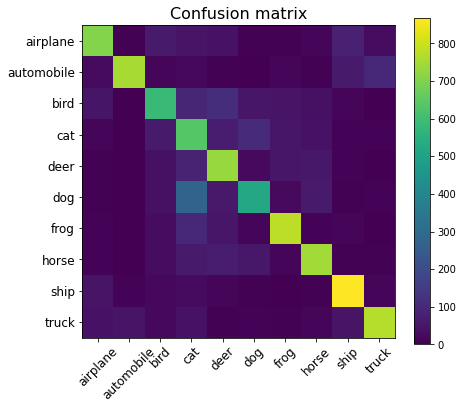

Test accuracy: 0.7108


In [58]:
# confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(confusion_matrix(yt, y_pred_test_classes))
plt.xticks(np.arange(10), cifar10_classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), cifar10_classes, fontsize=12)
plt.colorbar()
plt.show()
print("Test accuracy:", accuracy_score(yt, y_pred_test_classes))

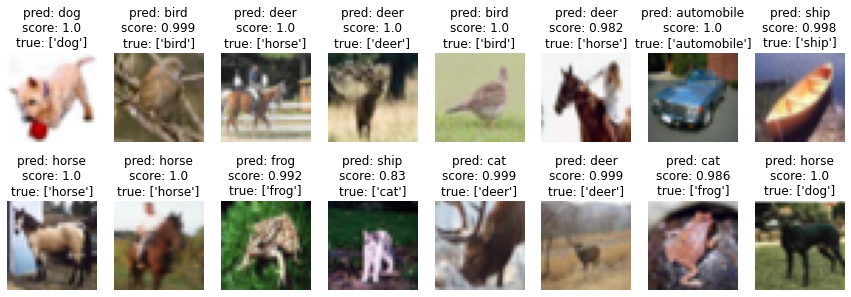

In [60]:
# inspect preditions
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(yt))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(test[random_index, :])
        pred_label = cifar10_classes[y_pred_test_classes[random_index]]
        pred_proba = y_pred_test_max_probas[random_index]
        true_label = cifar10_classes[yt[random_index]]
        ax.set_title("pred: {}\nscore: {:.3}\ntrue: {}".format(
               pred_label, pred_proba, true_label
        ))
plt.show()